In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
# Sequential Composition
epsilon1 = 1
epsilon2 = 1
epsilon_total = 2


In [17]:
# Satisfies 1-differential privacy
def F1():
    return np.random.laplace(loc=0, scale=1/epsilon1)

In [18]:
# Satisfies 1-differential privacy
def F2():
    return np.random.laplace(loc=0, scale=1/epsilon2)

In [19]:
# Satisfies 2-differential privacy
def F3():
    return np.random.laplace(loc=0, scale=1/epsilon_total)

In [20]:
# Satisfies 2-differential privacy by sequential composition
def F_combined():
    return (F1() + F2()) / 2

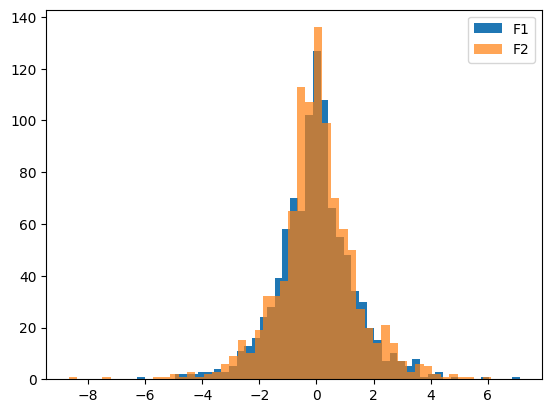

In [22]:
# Plot F1
plt.hist([F1() for i in range(1000)], bins=50, label='F1')

# Plot F2 (should look the same)
plt.hist([F2() for i in range(1000)], bins=50, alpha =.7, label='F2')
plt.legend()

In [23]:
# The histogram shows F1 and F2 look similar with 1-differential privacy

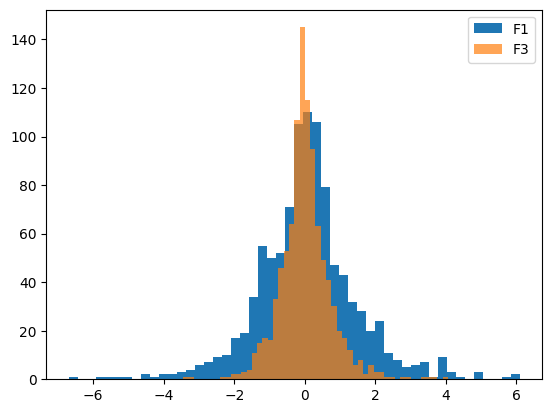

In [26]:
# If we graph F1 and F3, we see that the distribution of outputs from F3 looks "pointer" than that of F!,
# because its higher privacy budget implies less privacy.
plt.hist([F1() for i in range(1000)], bins=50, label='F1')
plt.hist([F3() for i in range(1000)], bins=50, alpha=.7, label='F3')
plt.legend()

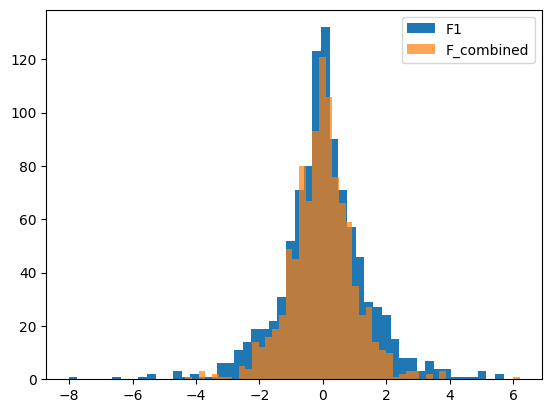

In [27]:
# If we graph F1 and F_combined, we see that the distribution outputs from F_combined is pointer.
# This shows more accuracy and less privacy
plt.hist([F1() for i in range(1000)], bins=50, label='F1')
plt.hist([F_combined() for i in range(1000)], bins=50, alpha=.7, label='F_combined')
plt.legend()

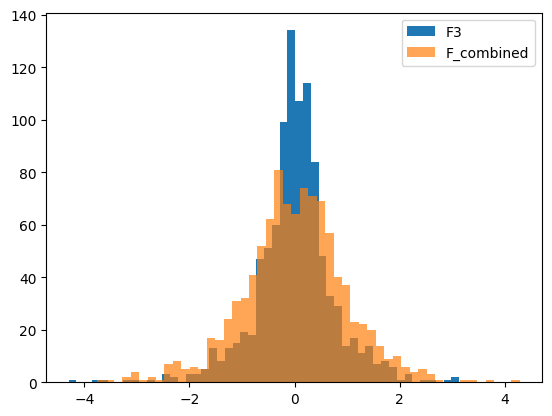

In [28]:
# What about F3 and F_combined?
# values for these two mechanisms are the same - both have an of 2. 
# Therefore, their output distributions should look the same.
plt.hist([F3() for i in range(1000)], bins=50, label='F3')
plt.hist([F_combined() for i in range(1000)], bins=50, alpha=.7, label='F_combined')
plt.legend()

In [ ]:
# In the above histogram, F3 still looks pointer because sequential composition yields an upper bound on the total 
# of several releases, the actual cumulative impact on privacy might be lower.
# Sequential composition is an extremely useful way to control total privacy cost. 
# Although it is not necessarily an exact bound.

In [4]:
# PARALLEL COMPOSITION
adult = pd.read_csv('adult_with_pii.csv')
adult['Education'].value_counts().to_frame().head(5)

,count
Education,
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1383


In [15]:
epsilon = 1

# This analysis has a total privacy cost of epsilon = 1, even though we release many results
f = lambda x: x + np.random.laplace(loc = 0, scale=1/epsilon)
s = adult['Education'].value_counts().apply(f)
s.to_frame().head(5)

,count
Education,
HS-grad,10496.692747
Some-college,7289.671240
Bachelors,5357.342090
Masters,1721.308658
Assoc-voc,1383.192846


In [18]:
# Contingency table example
pd.crosstab(adult['Education'], adult['Sex']).head(10)

Sex,Female,Male
Education,,
10th,295,638
11th,432,743
12th,144,289
1st-4th,46,122
5th-6th,84,249
7th-8th,160,486
9th,144,370
Assoc-acdm,421,646
Assoc-voc,500,883


In [19]:
# We safely use the contingency table to achieve parallel composition
f = lambda x: x + np.random.laplace(loc=0, scale=1/epsilon)
pd.crosstab(adult['Education'], adult['Sex']).apply(f).head(10)

Sex,Female,Male
Education,,
10th,296.459265,638.554809
11th,433.459265,743.554809
12th,145.459265,289.554809
1st-4th,47.459265,122.554809
5th-6th,85.459265,249.554809
7th-8th,161.459265,486.554809
9th,145.459265,370.554809
Assoc-acdm,422.459265,646.554809
Assoc-voc,501.459265,883.554809


In [5]:
adult.shape[0]

32564

In [6]:
adult[adult['Education-Num'] > 10 ]['Age'].mean()

41.973091185699346

In [7]:
adult['Age'].clip(lower=0, upper=125).sum()

1360238.0

Text(0, 0.5, 'Total Sum')

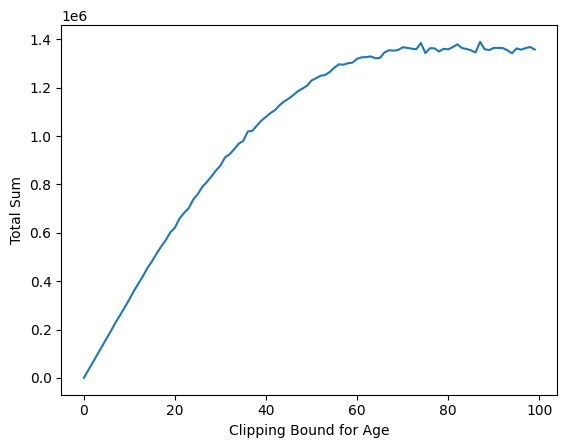

In [11]:
def laplace_merch(v, sensitivity, epsilon):
    return v + np.random.laplace(loc = 0, scale = sensitivity/epsilon)
epsilon_i = .01
plt.plot([laplace_merch(adult['Age'].clip(lower = 0, upper = i).sum(), i , epsilon_i) for i in range(100)])
plt.xlabel('Clipping Bound for Age')
plt.ylabel('Total Sum')